In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_folder = 'C:/Users/oryan/Documents/mergers-in-cosmos/data'
folder = 'C:/Users/oryan/Documents/mergers-in-cosmos'
student_folder = 'C:/Users/oryan/Documents/mergers-in-cosmos/followup-data'
results_folder = 'C:/Users/oryan/Documents/mergers-in-cosmos/back-to-basics-results'

In [3]:
df_matched = pd.read_csv(f'{student_folder}/group_cosmos_with_main_cosmos_matches_OUT1.csv', index_col = 0)

In [4]:
df_matched

,SourceID,RA_1a,Dec_1a,isStageOne,isStageTwo,isStageThree,isStageFour,ra_1,dec_1,type_1,...,m_k_2,mass_med_2,mass_med_min68_2,mass_med_max68_2,mass_best_2,sfr_med_2,sfr_med_min68_2,sfr_med_max68_2,sfr_best_2,Separation_2
col1,,,,,,,,,,,,,,,,,,,,,
21,4000705532455,150.679664,2.196615,False,True,True,False,150.679866,2.196563,0,...,-19.907,8.457,8.268,8.648,8.127,0.321,0.215,0.557,0.789,2.568817
22,4000705532984,150.673546,2.226438,True,False,False,False,150.673687,2.226308,0,...,-18.858,9.149,9.029,9.229,9.218,-0.343,-0.504,-0.210,-0.359,4.852455
23,4000705533312,150.667975,2.242945,False,False,True,False,150.668120,2.242867,0,...,-23.430,10.750,10.716,10.784,10.763,0.500,0.432,0.569,0.505,2.646160
24,4000705533383,150.645125,2.237650,True,False,False,False,150.645145,2.237538,0,...,-20.918,9.461,9.411,9.508,9.480,1.013,0.924,1.091,1.032,2.257583
25,4000705539435,149.700729,2.634871,False,False,False,True,149.700540,2.634988,0,...,-18.228,8.084,7.835,8.328,8.054,-0.145,-0.249,0.176,-0.136,7.357721
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21920,6000536185363,150.498697,2.651979,True,False,False,False,150.499015,2.652113,0,...,-22.949,10.900,10.866,10.934,10.889,-0.201,-0.269,-0.132,-0.231,3.121607
21921,6000536185496,150.500839,2.662972,True,False,False,False,150.501189,2.663116,0,...,-21.284,9.304,9.187,9.380,9.299,1.320,1.239,1.388,1.298,4.824996
21922,6000536185585,150.487245,2.671166,False,False,True,False,150.487626,2.671314,0,...,-23.149,10.277,10.179,10.376,10.273,1.695,1.337,2.040,1.753,1.779700


In [5]:
def get_cat(stage1, stage2, stage3, stage4):
    
    if stage1 and not stage2 and not stage3 and not stage4:
        return 'stage1'
    elif not stage1 and stage2 and not stage3 and not stage4:
        return 'stage2'
    elif not stage1 and not stage2 and stage3 and not stage4:
        return 'stage3'
    elif not stage1 and not stage2 and not stage3 and stage4:
        return 'stage4'
    elif np.sum([stage1, stage2, stage3, stage4]) == 0.0:
        return None
    elif np.sum([stage1, stage2, stage3, stage4]) > 1.5:
        return 'multiple'
    else:
        return 'failed'

In [6]:
df_category = (
    df_matched
    .assign(category = df_matched.apply(lambda row: get_cat(row.isStageOne, row.isStageTwo, row.isStageThree, row.isStageFour), axis = 1))
)

In [7]:
df_category.category.value_counts()

stage4      1190
stage2      1014
stage3       759
stage1       751
multiple       1
Name: category, dtype: int64

In [13]:
df_category[['SourceID', 'category']].query('category != "multiple"').to_csv(f'{data_folder}/source-stage.csv')

<AxesSubplot:xlabel='mass_best_1', ylabel='sfr_best_1'>

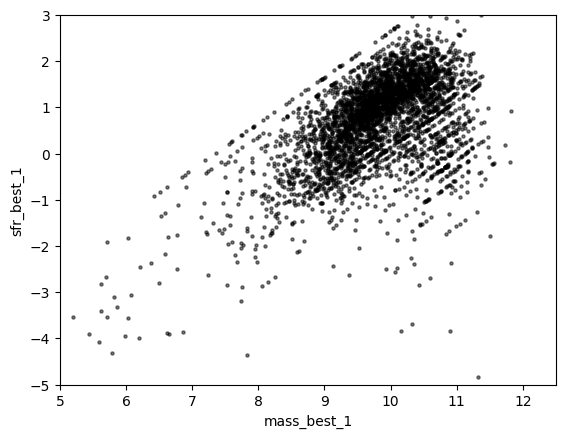

In [26]:
df_category.plot.scatter(
    x = 'mass_best_1',
    y = 'sfr_best_1',
    s = 5,
    color = 'black',
    alpha = 0.5,
    xlim = [5, 12.5],
    ylim = [-5, 3]
)

In [202]:
def scatter_hist(x, y, ax, ax_histx, ax_histy, colour):
    # no labels
    ax_histx.tick_params(axis="x", labelbottom=False)
    ax_histy.tick_params(axis="y", labelleft=False)

    # the scatter plot:
    ax.scatter(x, y, s = 0.5, color=colour, alpha = 0.5)
    sns.kdeplot(x=x,y=y, ax=ax, thresh = 0.1, levels = 6)
    ax.set_xlim([6.5,12.5])
    ax.set_ylim([-6, 3.5])

    # now determine nice limits by hand:
    binwidth = 0.25
    xymax = max(12.5, 3.5)
    lim = (int(xymax/binwidth) + 1) * binwidth

    bins = np.arange(-lim, lim + binwidth, binwidth)
    ax_histx.hist(x, bins=bins, histtype = 'step', color = colour)
    ax_histy.hist(y, bins=bins, orientation='horizontal', histtype='step', color=colour)

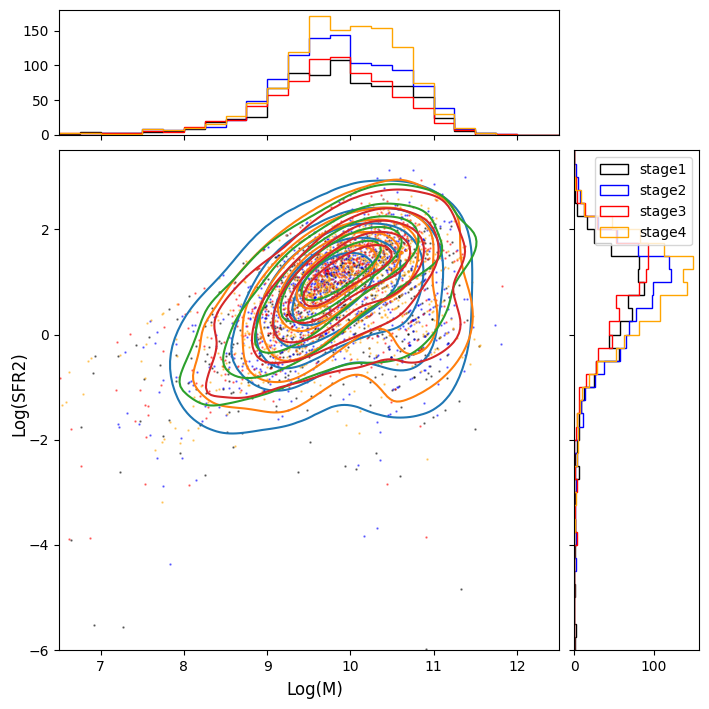

In [203]:
fig = plt.figure(figsize = (8,8))
gs = fig.add_gridspec(2,2, width_ratios = (4,1), height_ratios = (1,4), left = 0.1, right = 0.9, bottom = 0.1, top = 0.9, wspace=0.05, hspace=0.05)

ax = fig.add_subplot(gs[1,0])
ax_histx = fig.add_subplot(gs[0,0],sharex=ax)
ax_histy = fig.add_subplot(gs[1,1],sharey=ax)

colours = ['black','blue','red','orange']

for i in range(0,4):
    df_stage = df_category.query(f'category == "stage{i+1}"')

    scatter_hist(np.array(list(df_stage.mass_best_1)), np.array(list(df_stage.sfr_best_1)), ax, ax_histx, ax_histy, colours[i])
    
fig.text(0.42, 0.05, 'Log(M)', ha='center', va='center', fontsize = 12)
fig.text(0.05, 0.42, 'Log(SFR2)', ha='center', va='center', rotation='vertical', fontsize = 12)
plt.legend(['stage1','stage2','stage3','stage4'])

plt.show()

In [204]:
def create_plot_2(df, ax, stage, control):
    
#     ax_histx = fig.add_subplot(gs[0,0],sharex=ax)
#     ax_histy = fig.add_subplot(gs[1,1],sharey=ax)
    
#     scatter_hist(np.array(list(df.mass_best_1)), np.array(list(df.sfr_best_1)), ax, ax_histx, ax_histy, 'black')
    
    df.plot.scatter(
        x = 'mass_best_1',
        y = 'sfr_best_1',
        ax = ax,
        xlim = [5.5,12.5],
        ylim = [-6,3.0],
        xlabel = '',
        ylabel = '',
        title = f'{control} {stage}',
        color = 'black',
        alpha = 0.25,
        s = 5
    )

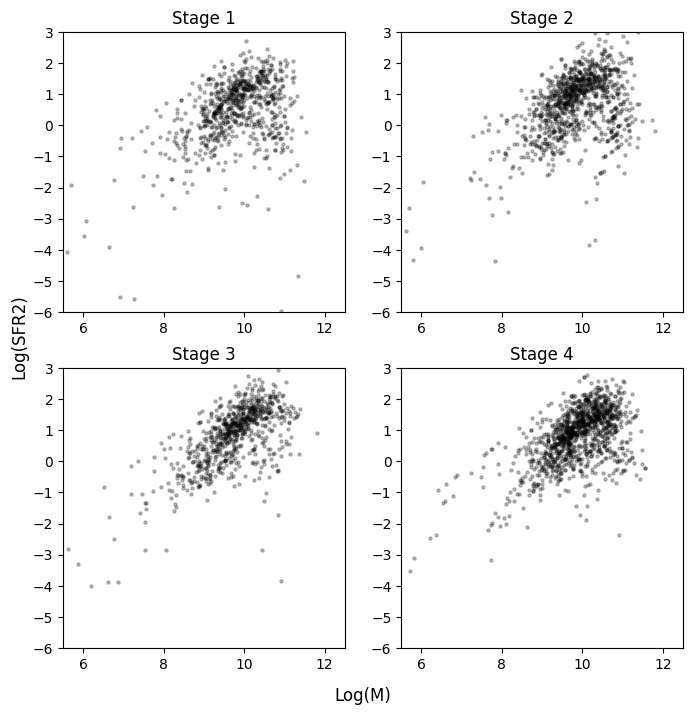

In [205]:
counter = 1
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (8,8))
for i in range(2):
    for j in range(2):
        create_plot_2(df_category.query(f'category == "stage{counter}"'), axes[i,j], counter, 'Stage')
        counter += 1
        
fig.text(0.5, 0.05, 'Log(M)', ha='center', va='center', fontsize = 12)
fig.text(0.07, 0.5, 'Log(SFR2)', ha='center', va='center', rotation='vertical', fontsize = 12)

plt.show()

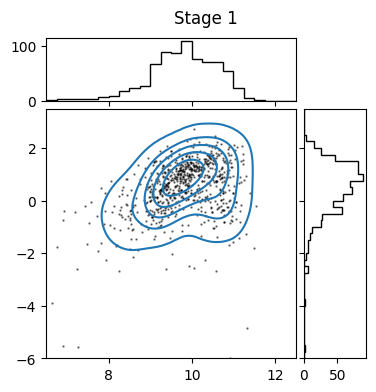

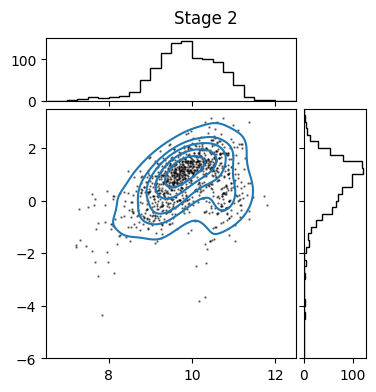

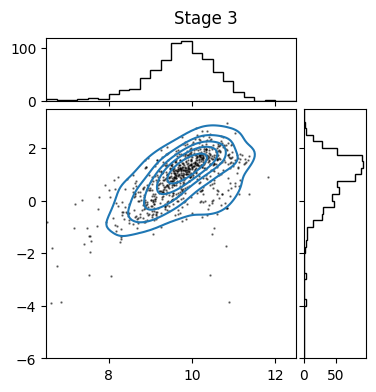

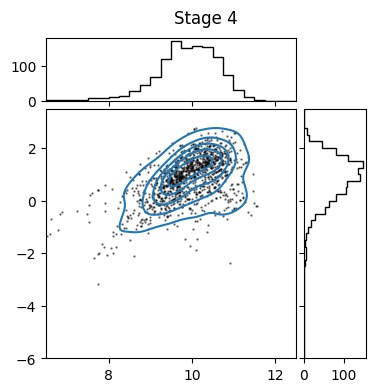

In [210]:
# colours = ['black','blue','red','orange']

for i in range(0,4):
    
    fig = plt.figure(figsize = (4,4))
    gs = fig.add_gridspec(2,2, width_ratios = (4,1), height_ratios = (1,4), left = 0.1, right = 0.9, bottom = 0.1, top = 0.9, wspace=0.05, hspace=0.05)

    ax = fig.add_subplot(gs[1,0])
    ax_histx = fig.add_subplot(gs[0,0],sharex=ax)
    ax_histy = fig.add_subplot(gs[1,1],sharey=ax)
    
    df_stage = df_category.query(f'category == "stage{i+1}"')

    scatter_hist(np.array(list(df_stage.mass_best_1)), np.array(list(df_stage.sfr_best_1)), ax, ax_histx, ax_histy, 'black')
    
    fig.text(0.5, 0.95, f'Stage {i + 1}', ha='center', va='center', fontsize = 12)
    
    plt.savefig(f'{results_folder}/stage{i+1}.jpeg', bbox_inches = 'tight', dpi = 100)
    
    plt.show()

AttributeError: 'AxesSubplot' object has no attribute 'add_gridspec'

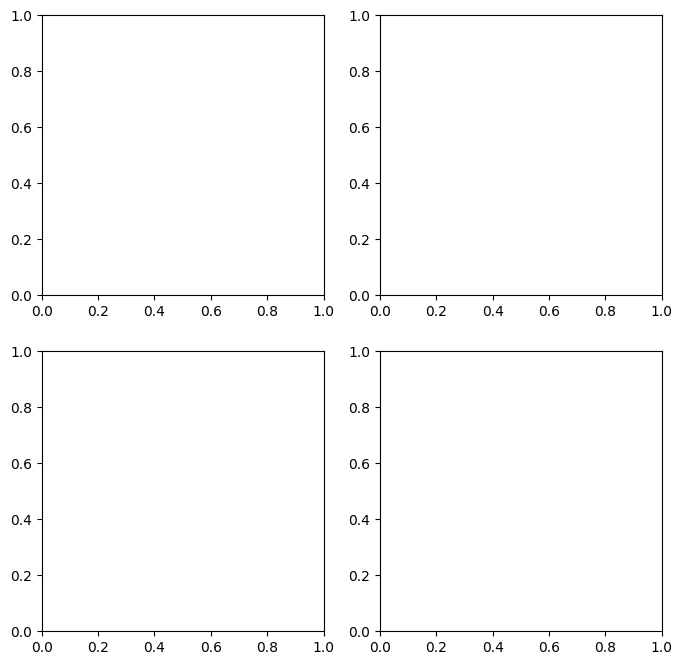

In [201]:
# colours = ['black','blue','red','orange']

fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (8,8))
counter = 0

for i in range(0,2):
    for j in range(0,2):
        counter += 1
        ax = axes[i,j]

        gs = ax.add_gridspec(2,2, width_ratios = (4,1), height_ratios = (1,4), left = 0.1, right = 0.9, bottom = 0.1, top = 0.9, wspace=0.05, hspace=0.05)

        scat_ax = ax.add_subplot(gs[1,0])
        ax_histx = ax.add_subplot(gs[0,0],sharex=ax)
        ax_histy = ax.add_subplot(gs[1,1],sharey=ax)

        df_stage = df_category.query(f'category == "stage{counter}"')

        scatter_hist(np.array(list(df_stage.mass_best_1)), np.array(list(df_stage.sfr_best_1)), scat_ax, ax_histx, ax_histy, 'black')

plt.title(f'Stage {i+1}')

plt.show()